In [21]:
# імпорт бібліотек

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
from scipy.stats.stats import pearsonr

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Activation, Dropout
from tensorflow.keras.optimizers import Adam, SGD
#from tensorflow.keras.regularizers import l2
#from tensorflow.keras.models import save_model
#from tensorflow.keras import regularizers

from statsmodels.tsa.stattools import adfuller
# from scipy.stats import shapiro

import matplotlib.pyplot as plt

# from tensorflow.keras.models import load_model
import plotly.graph_objects as go

In [2]:
# перевірка версії Numpy
np.__version__

'1.19.5'

In [3]:
# завантаження даних
df = pd.read_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\ready_data.csv', index_col = 'Date')
df.head()

,BZ=F_oil,CL=F_oil,GLD,SI=F,AAPL,BAC,C,CS,DB,GSBD(march-19-2015),...,MFI,google_trends,inv_fft3,inv_fft6,inv_fft9,inv_fft20,inv_fft100,maxlogit,sentiment,GS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,80.120003,81.510002,109.800003,17.440001,7.643214,15.690000,34.000000,50.771484,69.875954,20.382376,...,50.000000,18.13,196.329058,206.848904,227.129638,252.493514,248.891640,0.0,neutral,173.080002
2010-01-05,80.589996,81.769997,109.699997,17.781000,7.656429,16.200001,35.299999,51.191406,71.211830,20.382376,...,100.000000,14.43,196.241785,206.683378,226.724462,251.131430,240.649170,0.0,neutral,176.139999
2010-01-06,81.889999,83.180000,111.510002,18.163000,7.534643,16.389999,36.400002,50.478516,69.980919,20.382376,...,61.305811,12.58,196.154250,206.517375,226.316058,249.756022,232.466705,0.0,neutral,174.259995
2010-01-07,81.510002,82.660004,110.820000,18.333000,7.520714,16.930000,36.500000,52.519531,70.772903,20.382376,...,73.562538,19.61,196.066451,206.350900,225.904467,248.367889,224.401234,0.0,neutral,177.669998
2010-01-08,81.370003,82.750000,111.370003,18.458000,7.570714,16.780001,35.900002,53.291016,73.330154,20.382376,...,58.315108,17.76,195.978388,206.183958,225.489733,246.967633,216.508114,0.0,neutral,174.309998


In [4]:
df.columns

Index(['BZ=F_oil', 'CL=F_oil', 'GLD', 'SI=F', 'AAPL', 'BAC', 'C', 'CS', 'DB',
       'GSBD(march-19-2015)', 'HRI', 'JPM', 'LYG', 'MAN', 'MS', 'MUFG', 'UBS',
       'CNYUSD=X', 'EURUSD=X', 'GBPUSD=X', 'JPYUSD=X', 'RUBUSD=X',
       'google_trends_GS', '10YBIR', 'DFF', 'LIBOR', '10YearBondUS', 'TNX',
       'VIX', 'CPALTT01USM657N', 'M2SL', 'MEDCPIM158SFRBCLE', 'PPIACO',
       'UNRATE', 'GDP', 'GDPC1', 'DJIA', 'FTSE', 'HSI', 'IXIC', 'N225', 'NYA',
       'RUT', 'S&P500', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'MA7',
       'MA21', 'EMA', 'PCh_up', 'PCh_dn', 'PCc_mid', '20STD', 'upper_band',
       'lower_band', 'LeadingSpanA', 'LeadingSpanB', 'BaseLine',
       'ConversionLine', 'MassIndex', 'Stoch', 'StochSignal', 'rsi', 'EMA12',
       'EMA26', 'MACD', 'GSshift1', 'ROC7', 'momentum', 'VWAP', 'MFI',
       'google_trends', 'inv_fft3', 'inv_fft6', 'inv_fft9', 'inv_fft20',
       'inv_fft100', 'maxlogit', 'sentiment', 'GS'],
      dtype='object')

In [5]:
cols_to_drop = ['Adj Close', 'Open', 'High', 'Low', 'Adj Close']
df.drop(cols_to_drop, axis = 1, inplace=True)
df.columns

Index(['BZ=F_oil', 'CL=F_oil', 'GLD', 'SI=F', 'AAPL', 'BAC', 'C', 'CS', 'DB',
       'GSBD(march-19-2015)', 'HRI', 'JPM', 'LYG', 'MAN', 'MS', 'MUFG', 'UBS',
       'CNYUSD=X', 'EURUSD=X', 'GBPUSD=X', 'JPYUSD=X', 'RUBUSD=X',
       'google_trends_GS', '10YBIR', 'DFF', 'LIBOR', '10YearBondUS', 'TNX',
       'VIX', 'CPALTT01USM657N', 'M2SL', 'MEDCPIM158SFRBCLE', 'PPIACO',
       'UNRATE', 'GDP', 'GDPC1', 'DJIA', 'FTSE', 'HSI', 'IXIC', 'N225', 'NYA',
       'RUT', 'S&P500', 'Volume', 'MA7', 'MA21', 'EMA', 'PCh_up', 'PCh_dn',
       'PCc_mid', '20STD', 'upper_band', 'lower_band', 'LeadingSpanA',
       'LeadingSpanB', 'BaseLine', 'ConversionLine', 'MassIndex', 'Stoch',
       'StochSignal', 'rsi', 'EMA12', 'EMA26', 'MACD', 'GSshift1', 'ROC7',
       'momentum', 'VWAP', 'MFI', 'google_trends', 'inv_fft3', 'inv_fft6',
       'inv_fft9', 'inv_fft20', 'inv_fft100', 'maxlogit', 'sentiment', 'GS'],
      dtype='object')

### Label Encoding

In [6]:
# кодування настроїв новин від 0 до 2
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [7]:
for ind, x in enumerate(label_encoder.classes_):
    print(ind, x)

0 negative
1 neutral
2 positive


### Train test split

In [8]:
# дати поділу вибірки
first_timestamp = '2018-01-01' # тренувальні - валідаційні
second_timestamp = '2019-09-01'  # валідаційні - тестові

In [9]:
df[df.index < first_timestamp][['GS']]

,GS
Date,
2010-01-04,173.080002
2010-01-05,176.139999
2010-01-06,174.259995
2010-01-07,177.669998
2010-01-08,174.309998
...,...
2017-12-27,255.949997
2017-12-28,256.500000
2017-12-29,254.759995


In [18]:
data1 = df[df.index < first_timestamp][['GS']]
data2 = df[(df.index >= first_timestamp) & (df.index < second_timestamp)][['GS']]
data3 = df[df.index >= second_timestamp][['GS']]


In [50]:
trace0 = go.Scatter(
        x=data1.index, y=data1['GS'], name= 'Train data', marker ={'color': 'green'} ##1f77b4
            )

trace1 = go.Scatter(
            x=data2.index, y= data2['GS'], name='Validation data', marker ={'color': 'blue'} #ff7f0e
        )

trace2 = go.Scatter(
            x=data3.index, y=data3['GS'], name= 'Test data', marker ={'color': 'red'}
        )



data= [trace0, trace1, trace2]
        # data =[]
layout = go.Layout(
            title="Split dataset: solit timestamps "+first_timestamp +' and '+ second_timestamp,
            height=470,
        width = 1000
        )

fig = go.Figure(data=data, layout=layout)
fig.update_layout(
            xaxis_title="Time",
            yaxis_title="Values",
           
    )

In [47]:
fig.show()

In [9]:
# поділ датасету на тренувальні+валідаційні та тестові
train_val_dataset = df[df.index < '2019-09-01']
test_dataset = df[df.index >= '2019-09-01']

train_val_dataset.shape, test_dataset.shape

((3527, 79), (579, 79))

In [10]:
# довжина вчідного вектора та передбачуваного вектора
n_steps_in, n_steps_out = 60 , 30 

In [11]:
# подовження тестової вибірки
test_dataset_extended = train_val_dataset.tail(n_steps_in-1)
test_dataset_extended = test_dataset_extended.append(test_dataset, ignore_index = False)

train_val_dataset.shape, test_dataset_extended.shape

((3527, 79), (638, 79))

In [12]:
test_dataset_extended.head(2)

,BZ=F_oil,CL=F_oil,GLD,SI=F,AAPL,BAC,C,CS,DB,GSBD(march-19-2015),...,MFI,google_trends,inv_fft3,inv_fft6,inv_fft9,inv_fft20,inv_fft100,maxlogit,sentiment,GS
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-04,63.620003,57.089999,132.885002,14.996667,51.080000,29.154999,71.125000,12.175,7.92,19.855001,...,90.223733,9.10,217.565940,196.085916,211.945700,198.735558,205.747047,0.495423,2,206.969993
2019-07-05,64.230003,57.509998,132.139999,14.918000,51.057499,29.260000,71.400002,12.250,8.03,19.760000,...,89.720551,15.08,217.545525,196.084572,212.128142,198.493423,206.715011,1.651887,0,207.899994


### Standartization

In [13]:
# всі колонки крім категоріальної та сили емоції
cols_to_transform = np.asarray(list(filter(lambda x: x !='maxlogit' and x != 'sentiment', np.asarray(df.columns))))

In [14]:
train_val_dataset_scale = train_val_dataset.copy()
test_dataset_scale = test_dataset_extended.copy()

# стандартизація
standard_scaler = StandardScaler()


# тренуваьна та тестова вибірки окремо
train_val_dataset_scale[cols_to_transform] = standard_scaler.fit_transform(train_val_dataset_scale[cols_to_transform])
test_dataset_scale[cols_to_transform] = standard_scaler.transform(test_dataset_scale[cols_to_transform])


In [15]:
train_val_dataset_scale.head(2)

,BZ=F_oil,CL=F_oil,GLD,SI=F,AAPL,BAC,C,CS,DB,GSBD(march-19-2015),...,MFI,google_trends,inv_fft3,inv_fft6,inv_fft9,inv_fft20,inv_fft100,maxlogit,sentiment,GS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,-0.020523,0.384453,-1.071420,-0.530172,-1.483984,-0.243614,-1.259143,2.603276,2.255428,-0.339027,...,-0.076114,1.150546,0.530097,0.768029,1.238127,1.844950,1.763665,0.0,1,-0.035474
2010-01-05,-0.002416,0.396220,-1.076959,-0.482381,-1.482938,-0.171738,-1.158777,2.644692,2.335302,-0.339027,...,2.364106,0.411800,0.527696,0.763867,1.228335,1.812497,1.567834,0.0,1,0.037172


### PCA

In [16]:
# функція побудови діаграми розсіювання
def plot_scatter(df, x, y):
    plt.figure(figsize=(8,6))
    plt.scatter(df[x], df[y], alpha=0.3, s=10)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid()
    plt.show()

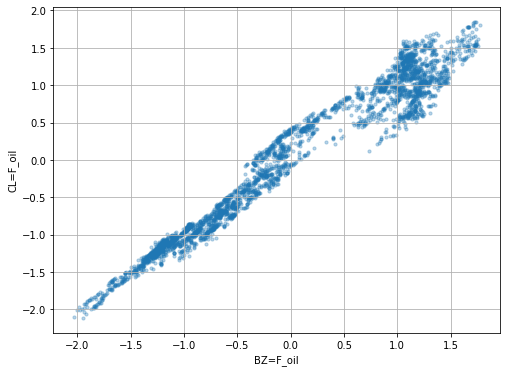

In [17]:
# діаграма розсіювання
plot_scatter(train_val_dataset_scale, 'BZ=F_oil', 'CL=F_oil')

In [18]:
# метод головних компонент
pca = PCA()
# підбор оптимальної розмірності
X_pca = pca.fit(train_val_dataset_scale[train_val_dataset_scale.columns[:-3]])

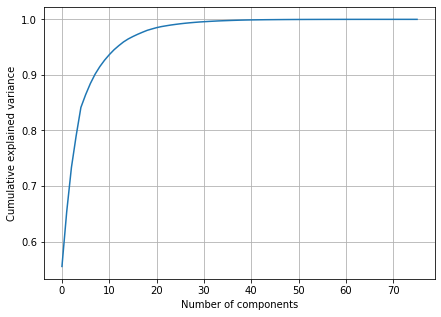

In [19]:
# графік підбору оптимальної розмірності
plt.figure(figsize=(7, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

In [20]:
# обрана кількість ознак
num_components = 30
# метод гол. комп.
pca = PCA(num_components)
# тренуальна та тестова вибірки окремо
X_train_val_pca = pca.fit_transform(train_val_dataset_scale[train_val_dataset_scale.columns[:-3]])
X_test_pca = pca.transform(test_dataset_scale[test_dataset_scale.columns[:-3]])

In [21]:
# початкова розмірнвсть
X_train_val_pca.shape, X_test_pca.shape

((3527, 30), (638, 30))

In [22]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
np.array(most_important_names)

array(['MS', 'UBS', 'rsi', 'PPIACO', 'CNYUSD=X', 'GSBD(march-19-2015)',
       'google_trends_GS', 'MassIndex', 'CPALTT01USM657N', '20STD',
       'MassIndex', 'Volume', 'Volume', 'GSBD(march-19-2015)',
       'MEDCPIM158SFRBCLE', 'VIX', 'Stoch', '10YBIR', 'HSI', 'MUFG',
       'MEDCPIM158SFRBCLE', 'CNYUSD=X', '10YBIR', '10YBIR', 'rsi',
       'google_trends_GS', 'CNYUSD=X', 'MAN', 'CNYUSD=X', 'UBS'],
      dtype='<U19')

In [23]:
# отримана розмірніть
pca_train_val_df, pca_test_df = pd.DataFrame(X_train_val_pca), pd.DataFrame(X_test_pca)

pca_train_val_df.set_index(train_val_dataset_scale.index, inplace=True)
pca_test_df.set_index(test_dataset_scale.index, inplace=True)

# з'єднання датасетів
pca_train_val_df = pd.merge(pca_train_val_df, train_val_dataset_scale[train_val_dataset_scale.columns[-3:]], \
                           how= 'right', left_index=True, right_index=True)
pca_test_df = pd.merge(pca_test_df, test_dataset_scale[test_dataset_scale.columns[-3:]], \
                      how= 'right', left_index=True, right_index=True)

pca_train_val_df.shape, pca_test_df.shape

((3527, 33), (638, 33))

### Stationarization

In [24]:
# колонки для стаціонаризації
cols_to_stationarize = list(filter(lambda x: x !='maxlogit' and x != 'sentiment', np.asarray(pca_train_val_df.columns)))

In [25]:
stationary_train_val_df = pca_train_val_df.copy()
stationary_test_df = pca_train_val_df.tail(1).append(pca_test_df, ignore_index=False)

# навчальна та тестова вибірки окремо
stationary_train_val_df[cols_to_stationarize] = stationary_train_val_df[cols_to_stationarize].diff()
stationary_train_val_df.fillna(method='bfill', inplace=True)

stationary_test_df[cols_to_stationarize] = stationary_test_df[cols_to_stationarize].diff()
stationary_test_df = stationary_test_df[1:]

# отримана розмірність
stationary_train_val_df.shape, stationary_test_df.shape

((3527, 33), (638, 33))

In [26]:
# кількітсть пропущених значень
stationary_train_val_df.isna().sum().sum(), stationary_test_df.isna().sum().sum()

(0, 0)

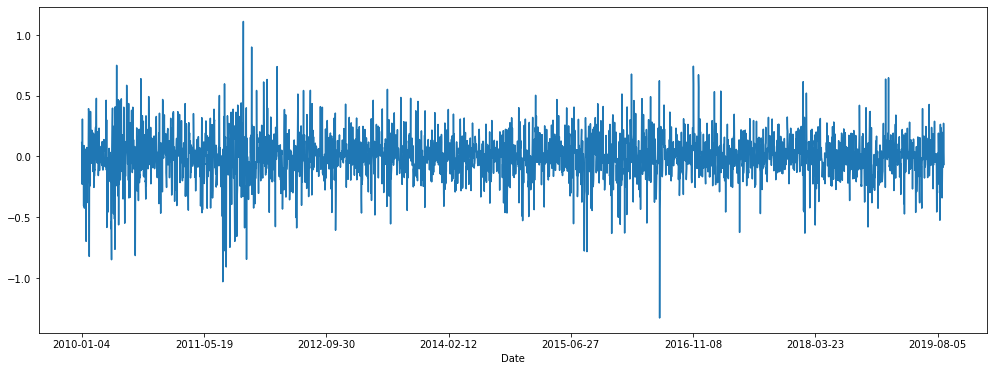

In [27]:
# візуалізація нової ознаки
stationary_train_val_df[1].plot(figsize=(17,6));

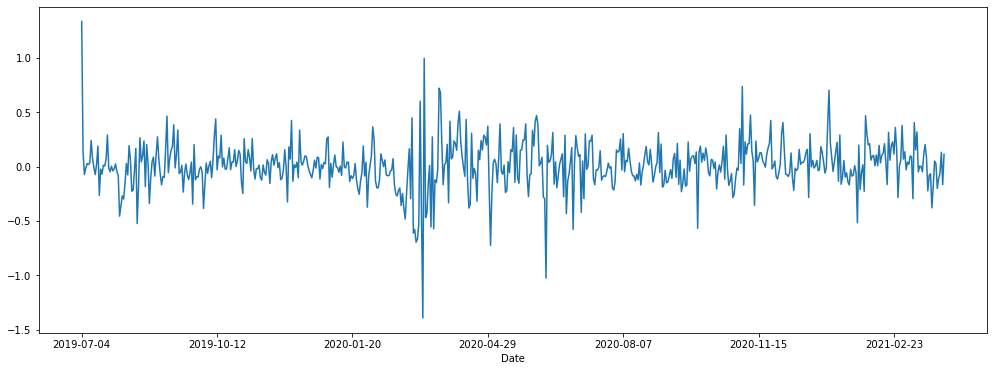

In [28]:
# візуалізація нової ознаки
stationary_test_df[1].plot(figsize=(17,6));

### Testing data

In [29]:
# тест Дікі-Фуллера для кожної ознаки на стаціонарність
def get_adfuller(df, check_stat_cols):
    res = []
    for col in check_stat_cols:
        dftest = adfuller(df[col])
        pval = dftest[1]
        if pval <= 0.05: # не приймаємо Н0 про нестаціонарність -- ряд стаціонарний
            res.append('stationary')
        else:           # приймаємо Н0 -- ряд нестаціонарний
            res.append('non-stationary')
    adfuller_result_df = pd.DataFrame({'Columns': check_stat_cols, 'Result': res})
    
    return adfuller_result_df

In [30]:
# результат тестування по кожній ознаці
adfuller_result_df = get_adfuller(stationary_train_val_df, cols_to_stationarize)
adfuller_result_df

,Columns,Result
0,0,stationary
1,1,stationary
2,2,stationary
3,3,stationary
4,4,stationary
5,5,stationary
6,6,stationary
7,7,stationary
8,8,stationary
9,9,stationary


In [31]:
# кількість стаціонарних/нестаціонарних
adfuller_result_df.groupby(['Result']).count()

,Columns
Result,
stationary,31


In [32]:
stationary_train_val_df.to_csv(r'C:\Users\adima\Desktop\thesis\project\data\stationaty_train.csv')

###  Create data for NN

In [29]:
first_timestamp, second_timestamp

('2018-01-01', '2019-09-01')

In [30]:
# поділ на:
train_dataset  = stationary_train_val_df[stationary_train_val_df.index < '2018-01-01'] # тренувальні
val_dataset = stationary_train_val_df[(stationary_train_val_df.index >= '2018-01-01')] # валідаційні
test_dataset_extended = stationary_test_df # тестові

In [31]:
# розмірність
train_dataset.shape, val_dataset.shape, test_dataset_extended.shape

((2919, 33), (608, 33), (638, 33))

In [32]:
# довжина (кількість) пояснюючих і пояснбваних змінних
n_steps_in, n_steps_out

(60, 30)

In [33]:
# розширення валідаційного датасету
val_dataset_extended = train_dataset.tail(n_steps_in-1)
val_dataset_extended = val_dataset_extended.append(val_dataset, ignore_index = False)

In [34]:
# розмірність
train_dataset.shape, val_dataset_extended.shape, test_dataset_extended.shape

((2919, 33), (667, 33), (638, 33))

In [35]:
# перетворення на масиви numpy
train_dataset_arr = train_dataset.to_numpy()
val_dataset_ext_arr = val_dataset_extended.to_numpy()
test_dataset_ext_arr = test_dataset_extended.to_numpy()

In [36]:
# зсув для формування вхідних та прогнозованих даних
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    n=1
    for i in range(len(sequences)):
        # знаходження кінця послідовності
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        
        # перевірка, чи не вийшов алг за межі датасета
        if out_end_ix > len(sequences):
            break
        # збір вхідних та вихідних даних
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        
        X.append(seq_x)
        y.append(seq_y)
        
        n+=1

    print('Len ready arr', n)
    print('Len sequance', len(sequences))
    print('-----------')
    
    
    return np.array(X), np.array(y)

In [37]:
# приведення даних до нового виду
X_train, y_train = split_sequences(train_dataset_arr, n_steps_in, n_steps_out) # тренувальні
X_val, y_val = split_sequences(val_dataset_ext_arr, n_steps_in, n_steps_out)# валідаційні 
X_test, y_test = split_sequences(test_dataset_ext_arr, n_steps_in, n_steps_out)# тестові
# розмірність даних
print('X_train shape =', X_train.shape, '; Y train shape =', y_train.shape)
print('X_val shape =', X_val.shape, '; Y val shape =', y_val.shape)
print('X_test shape =', X_test.shape, '; Y test shape =', y_test.shape)
n_features = X_train.shape[2]
# довжини послідовностей
print('N input length =', n_steps_in)
print('N output length =', n_steps_out)
print('N features = ', n_features)


Len ready arr 2832
Len sequance 2919
-----------
Len ready arr 580
Len sequance 667
-----------
Len ready arr 551
Len sequance 638
-----------
X_train shape = (2831, 60, 32) ; Y train shape = (2831, 30)
X_val shape = (579, 60, 32) ; Y val shape = (579, 30)
X_test shape = (550, 60, 32) ; Y test shape = (550, 30)
N input length = 60
N output length = 30
N features =  32


#### Save data

In [42]:
# шлях зберігання
outfile = r'C:\Users\adima\Desktop\thesis\data_overview\data\train_val_test.npz'

In [43]:
# зберігання 
np.savez(outfile, X_train = X_train, y_train = y_train, \
                    X_val = X_val, y_val = y_val, \
                     X_test = X_test, y_test = y_test)

In [44]:
# завантаження
npzfile = np.load(outfile)
npzfile.files

['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test']

In [45]:
npzfile['X_train']

array([[[ 1.36004224e-02,  1.14136482e-01, -1.16304984e+00, ...,
          1.63298964e-01,  0.00000000e+00,  1.00000000e+00],
        [ 1.36004224e-02,  1.14136482e-01, -1.16304984e+00, ...,
          1.63298964e-01,  0.00000000e+00,  1.00000000e+00],
        [ 2.17462838e-02, -2.28246533e-01,  1.48128037e+00, ...,
          6.53339635e-03,  0.00000000e+00,  1.00000000e+00],
        ...,
        [-7.04106142e-02,  2.40804294e-01, -7.68541983e-01, ...,
          1.77855969e-01,  2.18114805e+00,  0.00000000e+00],
        [-1.95738039e-03,  5.44831013e-02,  5.58852679e-01, ...,
         -1.53850950e-01,  1.79438150e+00,  1.00000000e+00],
        [ 5.78937069e-02,  2.30968237e-01, -2.19621006e+00, ...,
          1.01086381e-01,  1.05995452e+00,  1.00000000e+00]],

       [[ 1.36004224e-02,  1.14136482e-01, -1.16304984e+00, ...,
          1.63298964e-01,  0.00000000e+00,  1.00000000e+00],
        [ 2.17462838e-02, -2.28246533e-01,  1.48128037e+00, ...,
          6.53339635e-03,  0.00000000e

### LSTM Building

In [605]:
#optimizer

opt = Adam(learning_rate = 0.0001)

#model

model1 = Sequential()

model1.add(LSTM(50,  input_shape=(n_steps_in, n_features)))
model1.add(Dropout(0.2))

# model1.add(LSTM(50,  return_sequences=True))
# model1.add(Dropout(0.15))

# model1.add(LSTM(50))
# model1.add(Dropout(0.15))


model1.add(Dense(n_steps_out))
model1.add(Activation('linear'))

model1.compile(loss='mse' , optimizer=opt , metrics=['mse', 'mae'])

In [606]:
model1.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_71 (LSTM)               (None, 50)                16600     
_________________________________________________________________
dropout_71 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 30)                1530      
_________________________________________________________________
activation_44 (Activation)   (None, 30)                0         
Total params: 18,130
Trainable params: 18,130
Non-trainable params: 0
_________________________________________________________________


In [607]:
history1 = model1.fit(X_train , y_train , epochs=19, batch_size=120, \
                    #steps_per_epoch=21 , \
                      verbose=1 , \
                      validation_data=(X_val, y_val) , shuffle=False)

Epoch 1/19
24/24 [==============================] - 4s 160ms/step - loss: 0.0253 - mse: 0.0253 - mae: 0.1272 - val_loss: 0.0171 - val_mse: 0.0171 - val_mae: 0.1043
Epoch 2/19
24/24 [==============================] - 2s 71ms/step - loss: 0.0179 - mse: 0.0179 - mae: 0.1063 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0880
Epoch 3/19
24/24 [==============================] - 2s 71ms/step - loss: 0.0140 - mse: 0.0140 - mae: 0.0933 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0776
Epoch 4/19
24/24 [==============================] - 2s 75ms/step - loss: 0.0116 - mse: 0.0116 - mae: 0.0842 - val_loss: 0.0084 - val_mse: 0.0084 - val_mae: 0.0705
Epoch 5/19
24/24 [==============================] - 2s 72ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0784 - val_loss: 0.0075 - val_mse: 0.0075 - val_mae: 0.0657
Epoch 6/19
24/24 [==============================] - 2s 71ms/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0739 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0623
Epoch 7/19
24/24 [===

In [608]:
history1.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [609]:
def plot_error(train_err, val_error):
    plt.plot(history1.history[train_err])
    plt.plot(history1.history[val_error])
    plt.title('model ' + train_err)
    plt.ylabel(train_err)
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.grid()
    plt.show()

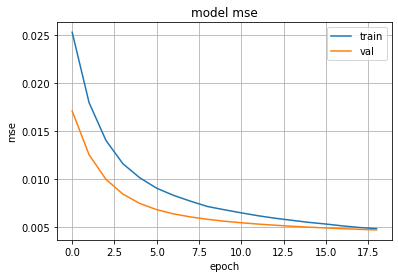

In [610]:
plot_error('mse', 'val_mse')

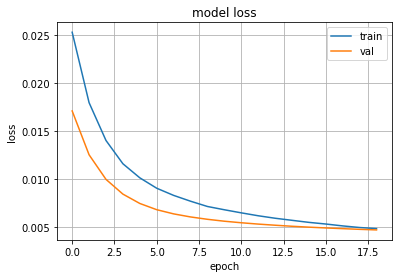

In [611]:
plot_error('loss', 'val_loss')

In [612]:
# прогнозування
y_pred = model1.predict(X_test)

In [613]:
last_train_val = pca_test_df['GS'].loc['2019-08-31']

# функція зворотної стандартизації
def invTransform(scaler, data):
    data = data.to_numpy()
    dummy = pd.DataFrame(np.zeros((len(data), scaler.n_features_in_)))
    dummy[dummy.columns[-1]] = data
    
    return scaler.inverse_transform(dummy)[:, -1]

# формування результатів роботи
def stack_output_test(y_pred, y_test):
    arr_pred = [block[0] for block in y_pred] # пониження розмірності, перехід до часового ряду
    arr_test = [block[0] for block in y_test]
    arr_pred, arr_test = np.array(arr_pred), np.array(arr_test)
    arr_pred, arr_test = np.append(arr_pred, y_pred[-1]), np.append(arr_test, y_test[-1])
    
    if len(arr_pred) == len(arr_test):
        print('Ok')
    else:
        print('Doesnt match')
        
    pred_df = pd.DataFrame(data = {'Predicted':arr_pred , 'Real': arr_test}, \
                           index = pd.to_datetime(np.arange(second_timestamp, len(arr_test), dtype = 'datetime64[D]')))
    
    # зворотня стаціонаризація
    pred_df['Predicted_non_stationary'] = np.r_[last_train_val, pred_df['Predicted']].cumsum()[1:] 
    pred_df['Real_non_stationary'] = np.r_[last_train_val, pred_df['Real']].cumsum()[1:]
    
    # зворотня стандартизація
    pred_df['Predicted_inverse'] = invTransform(standard_scaler, pred_df['Predicted_non_stationary'])
    pred_df['Real_inverse'] = invTransform(standard_scaler, pred_df['Real_non_stationary'])
    

    return pred_df

In [614]:
# результуючий датасет
pred_df = stack_output_test(y_pred, y_test)
pred_df

Ok


,Predicted,Real,Predicted_non_stationary,Real_non_stationary,Predicted_inverse,Real_inverse
2019-09-01,-0.032117,-0.029319,0.635003,0.637801,201.322140,201.440002
2019-09-02,-0.023514,-0.029319,0.611490,0.608482,200.331687,200.205002
2019-09-03,-0.023043,-0.029319,0.588447,0.579163,199.361063,198.970001
2019-09-04,-0.005663,0.065523,0.582784,0.644686,199.122524,201.729996
2019-09-05,0.004680,0.126299,0.587464,0.770985,199.319679,207.050003
...,...,...,...,...,...,...
2021-03-29,0.010590,-0.013136,-3.903805,3.684474,10.136383,329.773337
2021-03-30,-0.035985,-0.013136,-3.939791,3.671338,8.620597,329.220002
2021-03-31,-0.036493,0.149089,-3.976284,3.820427,7.083430,335.500001
2021-04-01,0.073045,-0.118939,-3.903239,3.701488,10.160255,330.489991


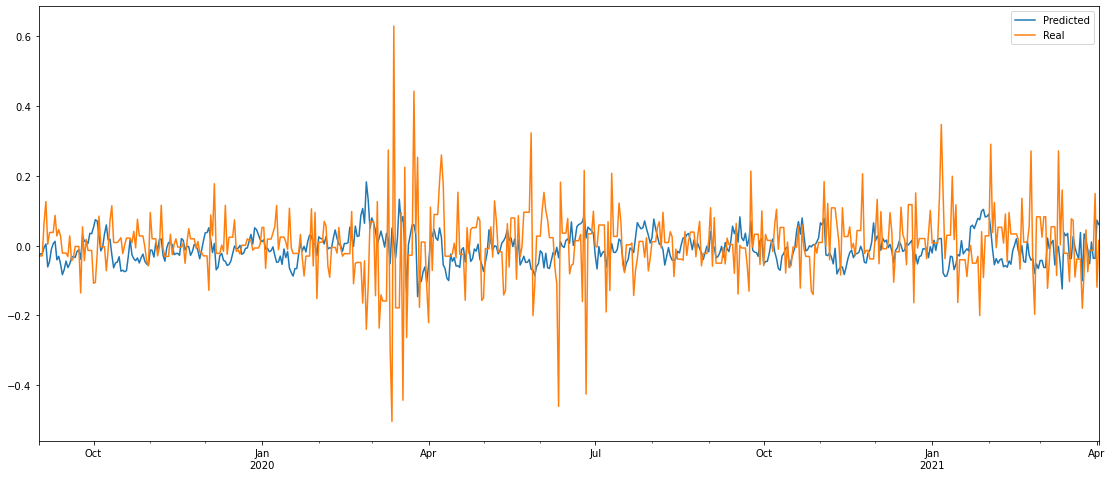

In [615]:
pred_df[['Predicted', 'Real']].plot(figsize=(19,8));

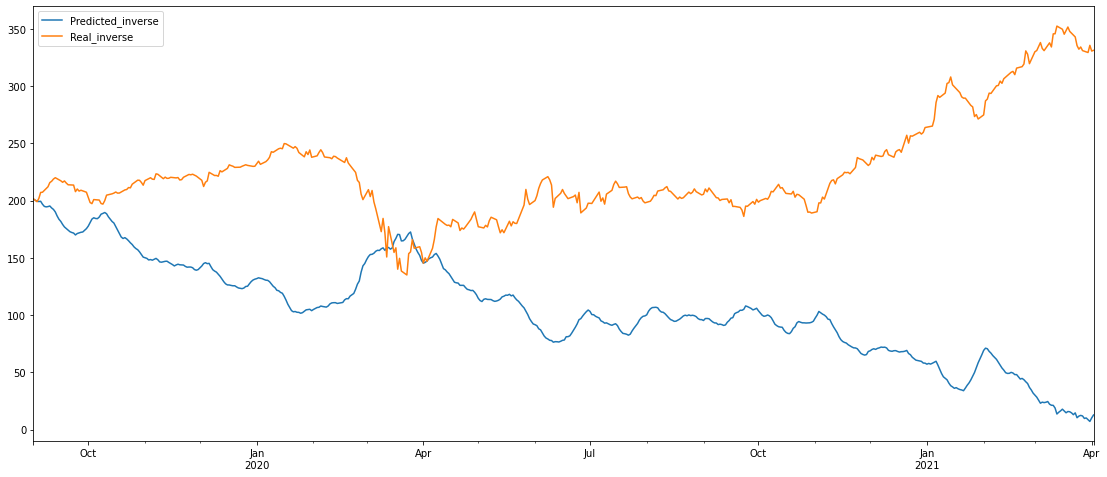

In [616]:
pred_df[['Predicted_inverse', 'Real_inverse']].plot(figsize=(19,8));

In [556]:
res_df = pd.DataFrame()
res_df['Metrics'] = ['MSE', 'MAE', 'R2', 'Cov', 'Rearson_corr']
res_df['Stat_Stand_Score'] = score_metr(pred_df['Real'], pred_df['Predicted'])
res_df['Final_Score'] = score_metr(pred_df['Real_inverse'], pred_df['Predicted_inverse'])

res_df

,Metrics,Stat_Stand_Score,Final_Score
0,MSE,0.006730,2356.548835
1,MAE,0.052460,38.229500
2,R2,0.250731,-0.206798
3,Cov,0.002018,2559.233930
4,Rearson_corr,0.505436,0.882136


In [47]:
# #optimizer

# opt = Adam(learning_rate = 0.0001)

# #model

# model = Sequential()

# model.add(LSTM(150, return_sequences=True, input_shape=(n_steps_in, n_features)))#bias_regularizer=l2(0.001),
# model.add(Dropout(0.2))

# model.add(LSTM(150))#, bias_regularizer=l2(0.001)
# model.add(Dropout(0.2))


# model.add(Dense(n_steps_out))
# model.add(Activation('linear'))

# model.compile(loss='mse' , optimizer=opt , metrics=['mse'])

In [48]:
# #optimizer

# opt = SGD(learning_rate = 0.001, clipvalue=4)

# #model

# model = Sequential()

# model.add(LSTM(100, return_sequences=True, input_shape=(n_steps_in, n_features)))#bias_regularizer=l2(0.001),
# model.add(Dropout(0.2))

# model.add(LSTM(100))#, bias_regularizer=l2(0.001)
# model.add(Dropout(0.2))


# model.add(Dense(n_steps_out))
# model.add(Activation('linear'))

# model.compile(loss='mse' , optimizer=opt , metrics=['mse'])

In [617]:
#optimizer

opt = Adam(learning_rate = 0.0001)

#model

model = Sequential()

model.add(LSTM(80, return_sequences=True, input_shape=(n_steps_in, n_features)))#перший шар
model.add(Dropout(0.2))# дропаут від перенавчання

model.add(LSTM(80))# другий шар
model.add(Dropout(0.2))# дропаут від перенавчання

model.add(Dense(n_steps_out))
model.add(Activation('linear')) # для рішення проблеми регресії - ф акт лінійна

model.compile(loss='mse' , optimizer=opt , metrics=['mse', 'mae']) # компіляція моделі

In [618]:
# опис
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_72 (LSTM)               (None, 60, 80)            36160     
_________________________________________________________________
dropout_72 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_73 (LSTM)               (None, 80)                51520     
_________________________________________________________________
dropout_73 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 30)                2430      
_________________________________________________________________
activation_45 (Activation)   (None, 30)                0         
Total params: 90,110
Trainable params: 90,110
Non-trainable params: 0
_________________________________________________

In [619]:
# навчання нейромережі
history = model.fit(X_train , y_train , epochs=50, batch_size=50, \
                    #steps_per_epoch=21 , \
                    verbose=1 , \
                    validation_data=(X_val, y_val) ,\
                    shuffle=False)

Epoch 1/50
57/57 [==============================] - 9s 152ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0500 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0455
Epoch 2/50
57/57 [==============================] - 7s 122ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0401 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0443
Epoch 3/50
57/57 [==============================] - 7s 122ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0377 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0437
Epoch 4/50
57/57 [==============================] - 7s 121ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0365 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0433
Epoch 5/50
57/57 [==============================] - 7s 121ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0355 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0430
Epoch 6/50
57/57 [==============================] - 7s 120ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0349 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0428
Epoch 7/50
57/57

In [620]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [621]:
def plot_error(train_err, val_error):
    plt.plot(history.history[train_err])
    plt.plot(history.history[val_error])
    plt.title('model ' + train_err)
    plt.ylabel(train_err)
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.grid()
    plt.show()

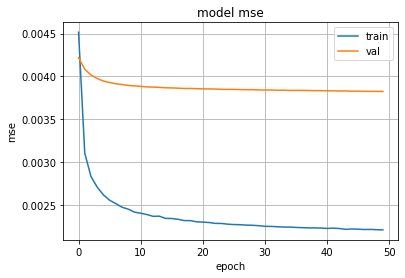

In [622]:
plot_error('mse', 'val_mse')

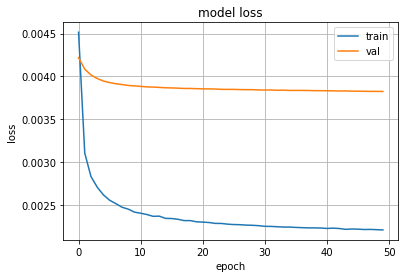

In [623]:
plot_error('loss', 'val_loss')

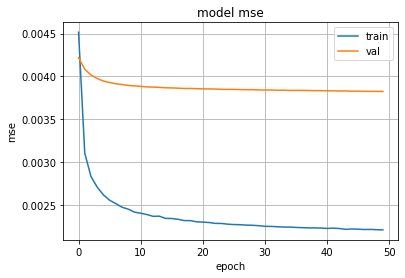

In [624]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

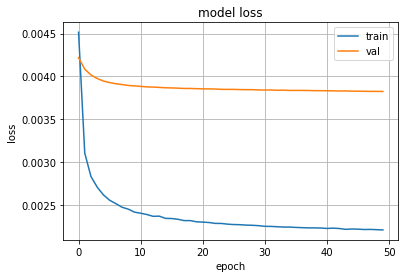

In [625]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

In [626]:
# save_model(model, r'C:\Users\adima\Desktop\thesis\models\keras_models', overwrite=True, include_optimizer=True)

In [627]:
# прогнозування
y_pred = model.predict(X_test)

In [628]:
# позмірність вихідних даних
y_pred.shape

(550, 30)

In [629]:
# last_train_val

In [630]:
last_train_val = pca_test_df['GS'].loc['2019-08-31']

# функція зворотної стандартизації
def invTransform(scaler, data):
    data = data.to_numpy()
    dummy = pd.DataFrame(np.zeros((len(data), scaler.n_features_in_)))
    dummy[dummy.columns[-1]] = data
    
    return scaler.inverse_transform(dummy)[:, -1]

# формування результатів роботи
def stack_output_test(y_pred, y_test):
    arr_pred = [block[0] for block in y_pred] # пониження розмірності, перехід до часового ряду
    arr_test = [block[0] for block in y_test]
    arr_pred, arr_test = np.array(arr_pred), np.array(arr_test)
    arr_pred, arr_test = np.append(arr_pred, y_pred[-1]), np.append(arr_test, y_test[-1])
    
    if len(arr_pred) == len(arr_test):
        print('Ok')
    else:
        print('Doesnt match')
        
    pred_df = pd.DataFrame(data = {'Predicted':arr_pred , 'Real': arr_test}, \
                           index = pd.to_datetime(np.arange(second_timestamp, len(arr_test), dtype = 'datetime64[D]')))
    
    # зворотня стаціонаризація
    pred_df['Predicted_non_stationary'] = np.r_[last_train_val, pred_df['Predicted']].cumsum()[1:] 
    pred_df['Real_non_stationary'] = np.r_[last_train_val, pred_df['Real']].cumsum()[1:]
    
    # зворотня стандартизація
    pred_df['Predicted_inverse'] = invTransform(standard_scaler, pred_df['Predicted_non_stationary'])
    pred_df['Real_inverse'] = invTransform(standard_scaler, pred_df['Real_non_stationary'])
    

    return pred_df

In [631]:
# результуючий датасет
pred_df = stack_output_test(y_pred, y_test)
pred_df

Ok


,Predicted,Real,Predicted_non_stationary,Real_non_stationary,Predicted_inverse,Real_inverse
2019-09-01,-0.015872,-0.029319,0.651249,0.637801,202.006435,201.440002
2019-09-02,-0.022839,-0.029319,0.628409,0.608482,201.044382,200.205002
2019-09-03,-0.022440,-0.029319,0.605969,0.579163,200.099141,198.970001
2019-09-04,0.002235,0.065523,0.608204,0.644686,200.193282,201.729996
2019-09-05,0.030863,0.126299,0.639067,0.770985,201.493302,207.050003
...,...,...,...,...,...,...
2021-03-29,0.001607,-0.013136,1.947071,3.684474,256.589641,329.773337
2021-03-30,-0.001946,-0.013136,1.945125,3.671338,256.507682,329.220002
2021-03-31,0.001386,0.149089,1.946511,3.820427,256.566061,335.500001
2021-04-01,-0.004655,-0.118939,1.941857,3.701488,256.370001,330.489991


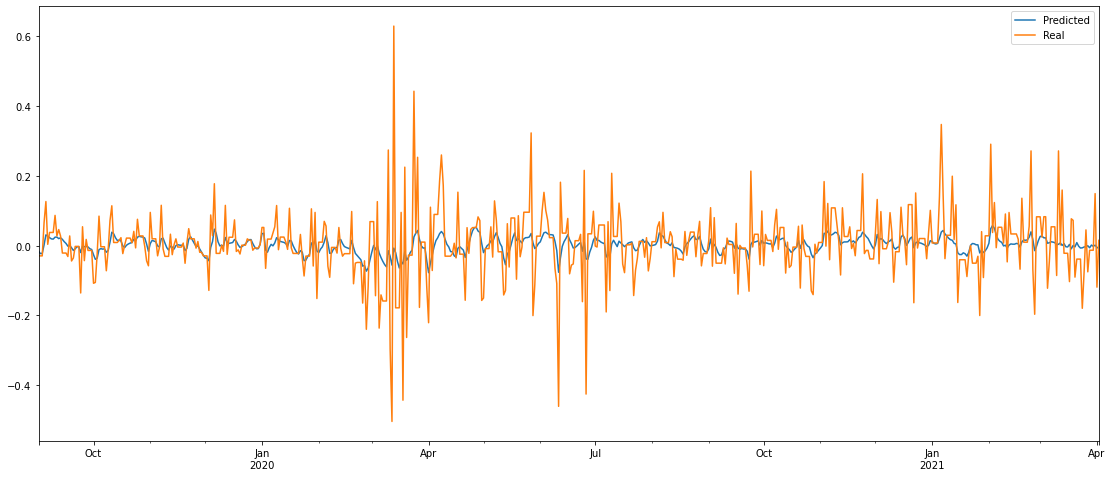

In [632]:
pred_df[['Predicted', 'Real']].plot(figsize=(19,8));

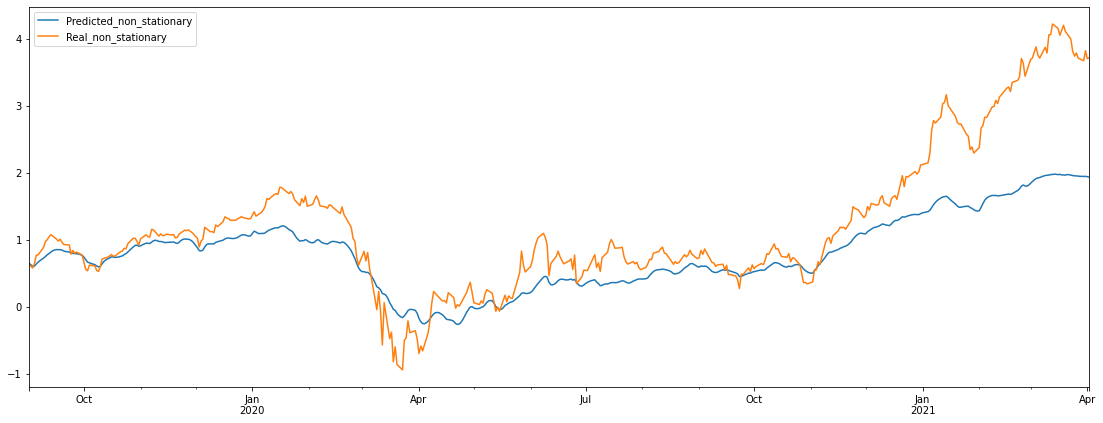

In [633]:
pred_df[['Predicted_non_stationary', 'Real_non_stationary']].plot(figsize=(19,7));

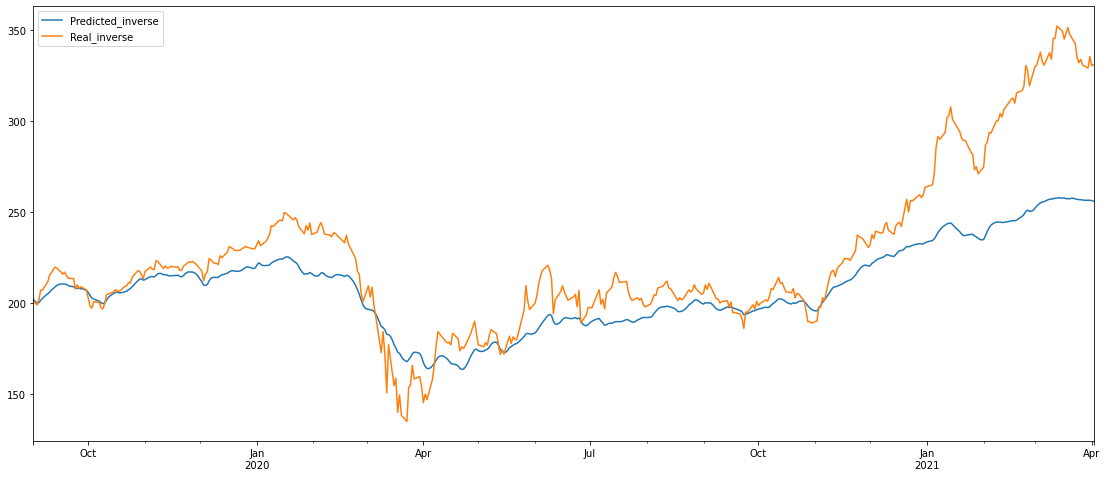

In [634]:
pred_df[['Predicted_inverse', 'Real_inverse']].plot(figsize=(19,8));

In [418]:
# метрики

def score_metr(real, pred):
    mse = mean_squared_error(real, pred) # mean_squared_error
    mae = mean_absolute_error(real, pred) # mean_absolute_error
    r2 = r2_score(real, pred) # r2_score
    cov = np.cov(real, pred)[0][1] # клваріація
    corr = pearsonr(real, pred)[0] # кореляція Пірсона
    
    return [mse, mae, r2, cov, corr]

In [419]:
res_df = pd.DataFrame()
res_df['Metrics'] = ['MSE', 'MAE', 'R2', 'Cov', 'Rearson_corr']
res_df['Stat_Stand_Score'] = score_metr(pred_df['Real'], pred_df['Predicted'])
res_df['Final_Score'] = score_metr(pred_df['Real_inverse'], pred_df['Predicted_inverse'])

res_df

,Metrics,Stat_Stand_Score,Final_Score
0,MSE,0.008107,1264.327284
1,MAE,0.056921,26.426911
2,R2,0.097412,0.352533
3,Cov,0.000512,436.686220
4,Rearson_corr,0.462349,0.794845


In [420]:
# зберігання моделі
model.save('model1706.h5')

In [834]:
model_ = load_model('model120120.h5')

In [146]:
# зберігання отриманих даних
a = pred_df.copy()
a = a.reset_index()
a.rename({'index':'Date'}, axis=1, inplace=True)
a.to_csv(r'C:\Users\adima\Desktop\thesis\project\data\predictions_final.csv', index=False)

In [176]:
pred_df2 = pd.read_csv(r'C:\Users\adima\Desktop\thesis\project\data\predictions_final.csv', index_col='Date')
pred_df2

,Predicted,Real,Predicted_non_stationary,Real_non_stationary,Predicted_inverse,Real_inverse
Date,,,,,,
2019-09-01,-0.005714,-0.029319,0.661406,0.637801,202.434297,201.440002
2019-09-02,-0.012753,-0.029319,0.648653,0.608482,201.897114,200.205002
2019-09-03,-0.014693,-0.029319,0.633960,0.579163,201.278206,198.970001
2019-09-04,0.001090,0.065523,0.635050,0.644686,201.324099,201.729996
2019-09-05,0.019603,0.126299,0.654653,0.770985,202.149831,207.050003
...,...,...,...,...,...,...
2021-03-29,0.003373,-0.013136,2.164624,3.684474,265.753523,329.773337
2021-03-30,-0.005464,-0.013136,2.159161,3.671338,265.523383,329.220002
2021-03-31,-0.012186,0.149089,2.146975,3.820427,265.010096,335.500001


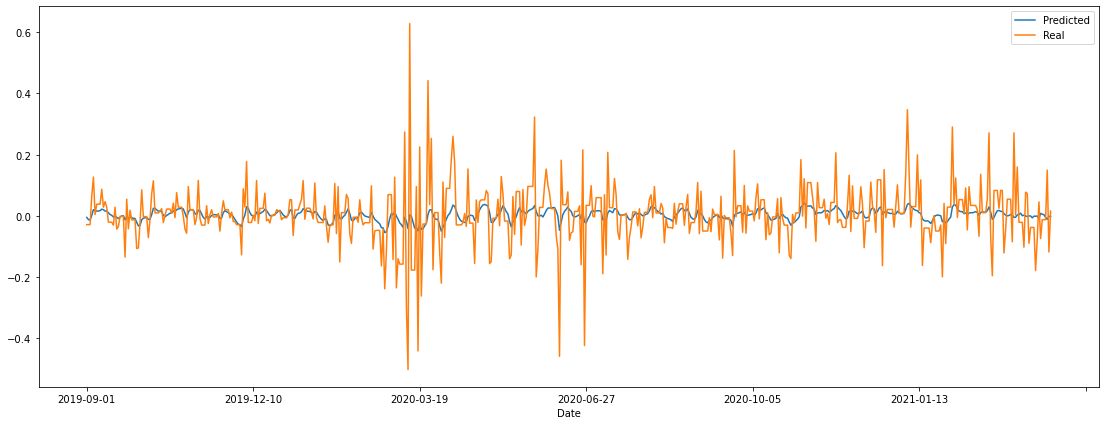

In [177]:
pred_df2[['Predicted', 'Real']].plot(figsize=(19,7));

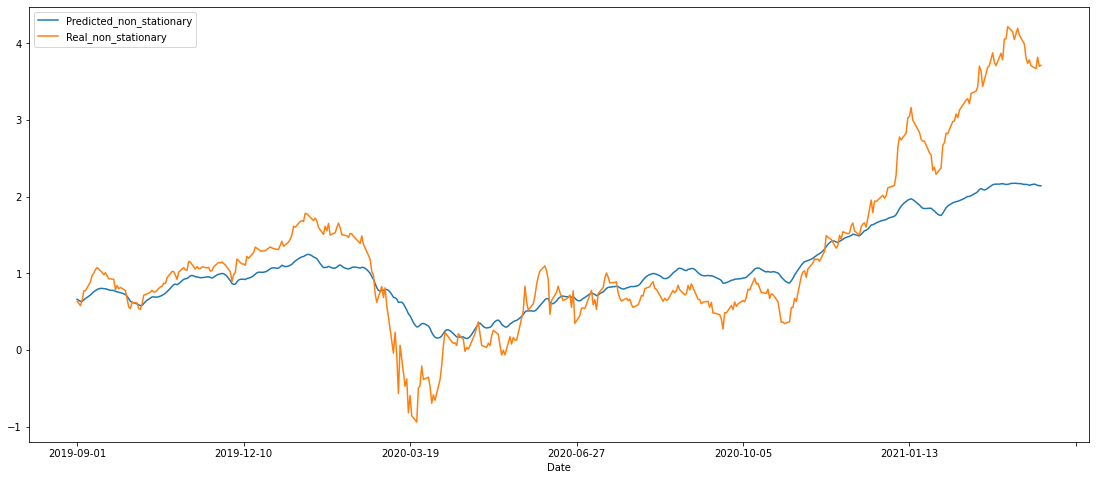

In [178]:
pred_df2[['Predicted_non_stationary', 'Real_non_stationary']].plot(figsize=(19,8));

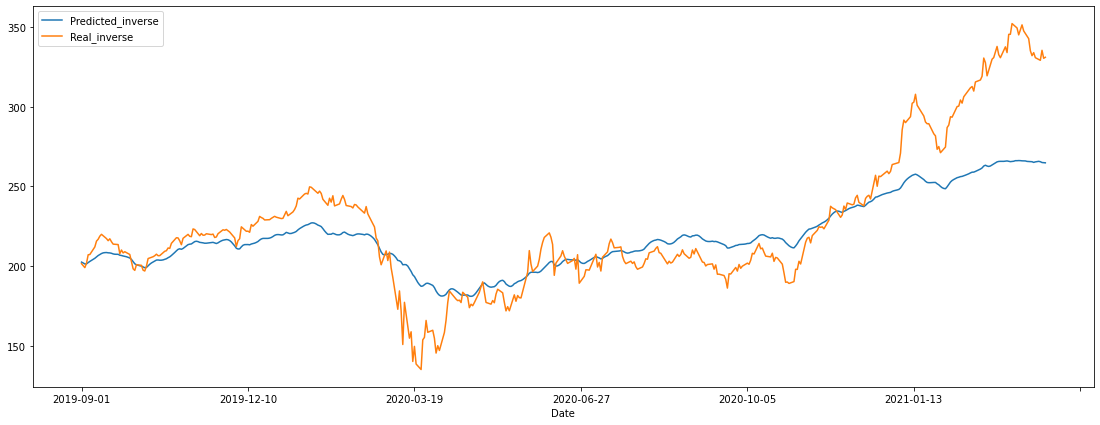

In [179]:
pred_df2[['Predicted_inverse', 'Real_inverse']].plot(figsize=(19,7));

In [173]:
# метрики

def score_metr(real, pred):
    mse = mean_squared_error(real, pred) # mean_squared_error
    mae = mean_absolute_error(real, pred) # mean_absolute_error
    r2 = r2_score(real, pred) # r2_score
    cov = np.cov(real, pred)[0][1] # клваріація
    corr = pearsonr(real, pred)[0] # кореляція Пірсона
    
    return [mse, mae, r2, cov, corr]


In [174]:
res_df = pd.DataFrame()
res_df['Metrics'] = ['MSE', 'MAE', 'R2', 'Cov', 'Rearson_corr']
res_df['Stat_Stand_Score'] = score_metr(pred_df['Real'], pred_df['Predicted'])
res_df['Final_Score'] = score_metr(pred_df['Real_inverse'], pred_df['Predicted_inverse'])

res_df

,Metrics,Stat_Stand_Score,Final_Score
0,MSE,0.007665,1081.957294
1,MAE,0.055221,24.237500
2,R2,0.146698,0.445926
3,Cov,0.000784,651.015381
4,Rearson_corr,0.536974,0.843824


In [8]:
np.cov(pred_df['Real_inverse'], pred_df['Predicted_inverse'])

array([[1956.10181547, 1506.23958559],
       [1506.23958559, 1339.37352434]])

In [82]:
res_df2 = pd.DataFrame()
res_df2['Metrics'] = ['MSE', 'MAE', 'R2', 'Cov', 'Rearson_corr']
res_df2['Stat_Stand_Score'] = score_metr(pred_df2['Real'], pred_df2['Predicted'])
res_df2['Final_Score'] = score_metr(pred_df2['Real_inverse'], pred_df2['Predicted_inverse'])

res_df2

,Metrics,Stat_Stand_Score,Final_Score
0,MSE,0.005801,529.070971
1,MAE,0.046266,18.080647
2,R2,0.354147,0.729061
3,Cov,0.002069,1506.239586
4,Rearson_corr,0.707208,0.930567


In [544]:
# a = pred_df.copy()
# a = a.reset_index()
# a.rename({'index':'Date'}, axis=1, inplace=True)
# a.to_csv(r'C:\Users\adima\Desktop\thesis\project\data\predictions.csv', index=False)

In [301]:
# a = pred_df.copy()
# a = a.reset_index()
# a.rename({'index':'Date'}, axis=1)
# #a.set_index('Date')


,Date,Predicted,Real,Predicted_non_stationary,Real_non_stationary,Predicted_inverse,Real_inverse
0,2019-09-01,-0.030414,-0.029319,0.636706,0.637801,201.393871,201.440002
1,2019-09-02,-0.018328,-0.029319,0.618378,0.608482,200.621850,200.205002
2,2019-09-03,-0.007775,-0.029319,0.610603,0.579163,200.294330,198.970001
3,2019-09-04,0.055309,0.065523,0.665912,0.644686,202.624071,201.729996
4,2019-09-05,0.092310,0.126299,0.758222,0.770985,206.512392,207.050003
...,...,...,...,...,...,...,...
575,2021-03-29,0.002150,-0.013136,3.874045,3.684474,337.758534,329.773337
576,2021-03-30,0.004599,-0.013136,3.878645,3.671338,337.952269,329.220002
577,2021-03-31,0.000994,0.149089,3.879638,3.820427,337.994127,335.500001
578,2021-04-01,-0.001990,-0.118939,3.877648,3.701488,337.910290,330.489991


In [149]:
# history_collection = []
# error_stat = []
# error_nonstat = []
# hyperparams = []

# for node_1 in [30, 40, 50]:
#     for node_2 in [30, 40, 50]:
#         #for reg in [0.01, 0.001, 0.0001]:
#             for eps in [80, 100, 120]:
#                 #for bs in [30, 32, 34]:
#                     #optimizer

#                     opt = Adam(learning_rate = 0.001)

#                     #model

#                     model = Sequential()

#                     model.add(LSTM(node_1, bias_regularizer=l2(0.001), return_sequences=True, input_shape=(n_steps_in, n_features)))
#                     model.add(Dropout(0.2))

#                     model.add(LSTM(node_2, bias_regularizer=l2(0.001)))
#                     model.add(Dropout(0.15))


#                     model.add(Dense(n_steps_out))
#                     model.add(Activation('linear'))

#                     model.compile(loss='mse' , optimizer=opt , metrics=['mse'])

#                     history = model.fit(X_train , y_train , epochs=eps , batch_size=32, \
#                         steps_per_epoch=25 , verbose=0 , validation_data=(X_val, y_val) , shuffle=False)

#                     history_collection.append(history)

#                     y_pred = model.predict(X_test)
#                     pred_df = stack_output_test(y_pred, y_test)

#                     error_stat.append(mean_squared_error(pred_df['Predicted'], pred_df['Real']))
#                     error_nonstat.append(mean_squared_error(pred_df['Predicted_non_stationary'], pred_df['Real_non_stationary']))

#                     hyperparams.append([node_1, node_2, eps])
#                     print(node_1, node_2,  eps)

Ok
30 30 80
Ok
30 30 100
Ok
30 30 120
Ok
30 40 80
Ok
30 40 100
Ok
30 40 120
Ok
30 50 80
Ok
30 50 100
Ok
30 50 120
Ok
40 30 80
Ok
40 30 100
Ok
40 30 120
Ok
40 40 80
Ok
40 40 100
Ok
40 40 120
Ok
40 50 80
Ok
40 50 100
Ok
40 50 120
Ok
50 30 80
Ok
50 30 100
Ok
50 30 120
Ok
50 40 80
Ok
50 40 100
Ok
50 40 120
Ok
50 50 80
Ok
50 50 100
Ok
50 50 120


In [157]:
# np.where(np.array(error_stat) == np.array(error_stat).min())

(array([25], dtype=int64),)

In [159]:
# np.where(np.array(error_nonstat) == np.array(error_nonstat).min())

(array([25], dtype=int64),)

In [158]:
# hyperparams[25]

[50, 50, 100]

In [200]:
# history = history_collection[25]